In [ ]:
!pip install seaborn
!pip install wordcloud
!pip install pandas
!pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline

In [ ]:
#set a random state
rs = 123

In [ ]:
# Point to the datasets stored on the cloud
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
ratings_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-ML0321EN-Coursera/labs/v2/module_3/ratings.csv"

# read the files
course_df = pd.read_csv(course_genre_url)
ratings_df = pd.read_csv(ratings_url)

Plot a Word Cloud from Course Titles

In [ ]:
# join titles into one string to get a word cloud from a big string
titles = " ".join(title for title in course_df['TITLE'].astype(str))
stopwords = set(STOPWORDS)
stopwords.update(["getting started", "using", "enabling", "template", "university", "end", "introduction", "basic"])
wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400)
wordcloud.generate(titles)

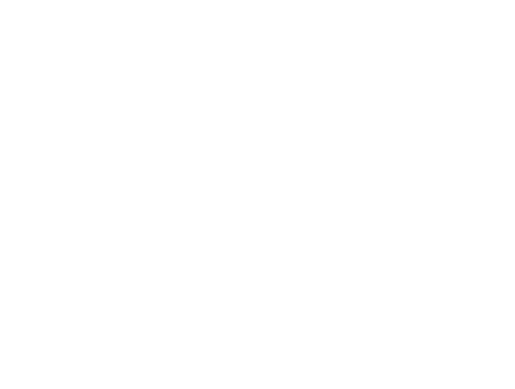

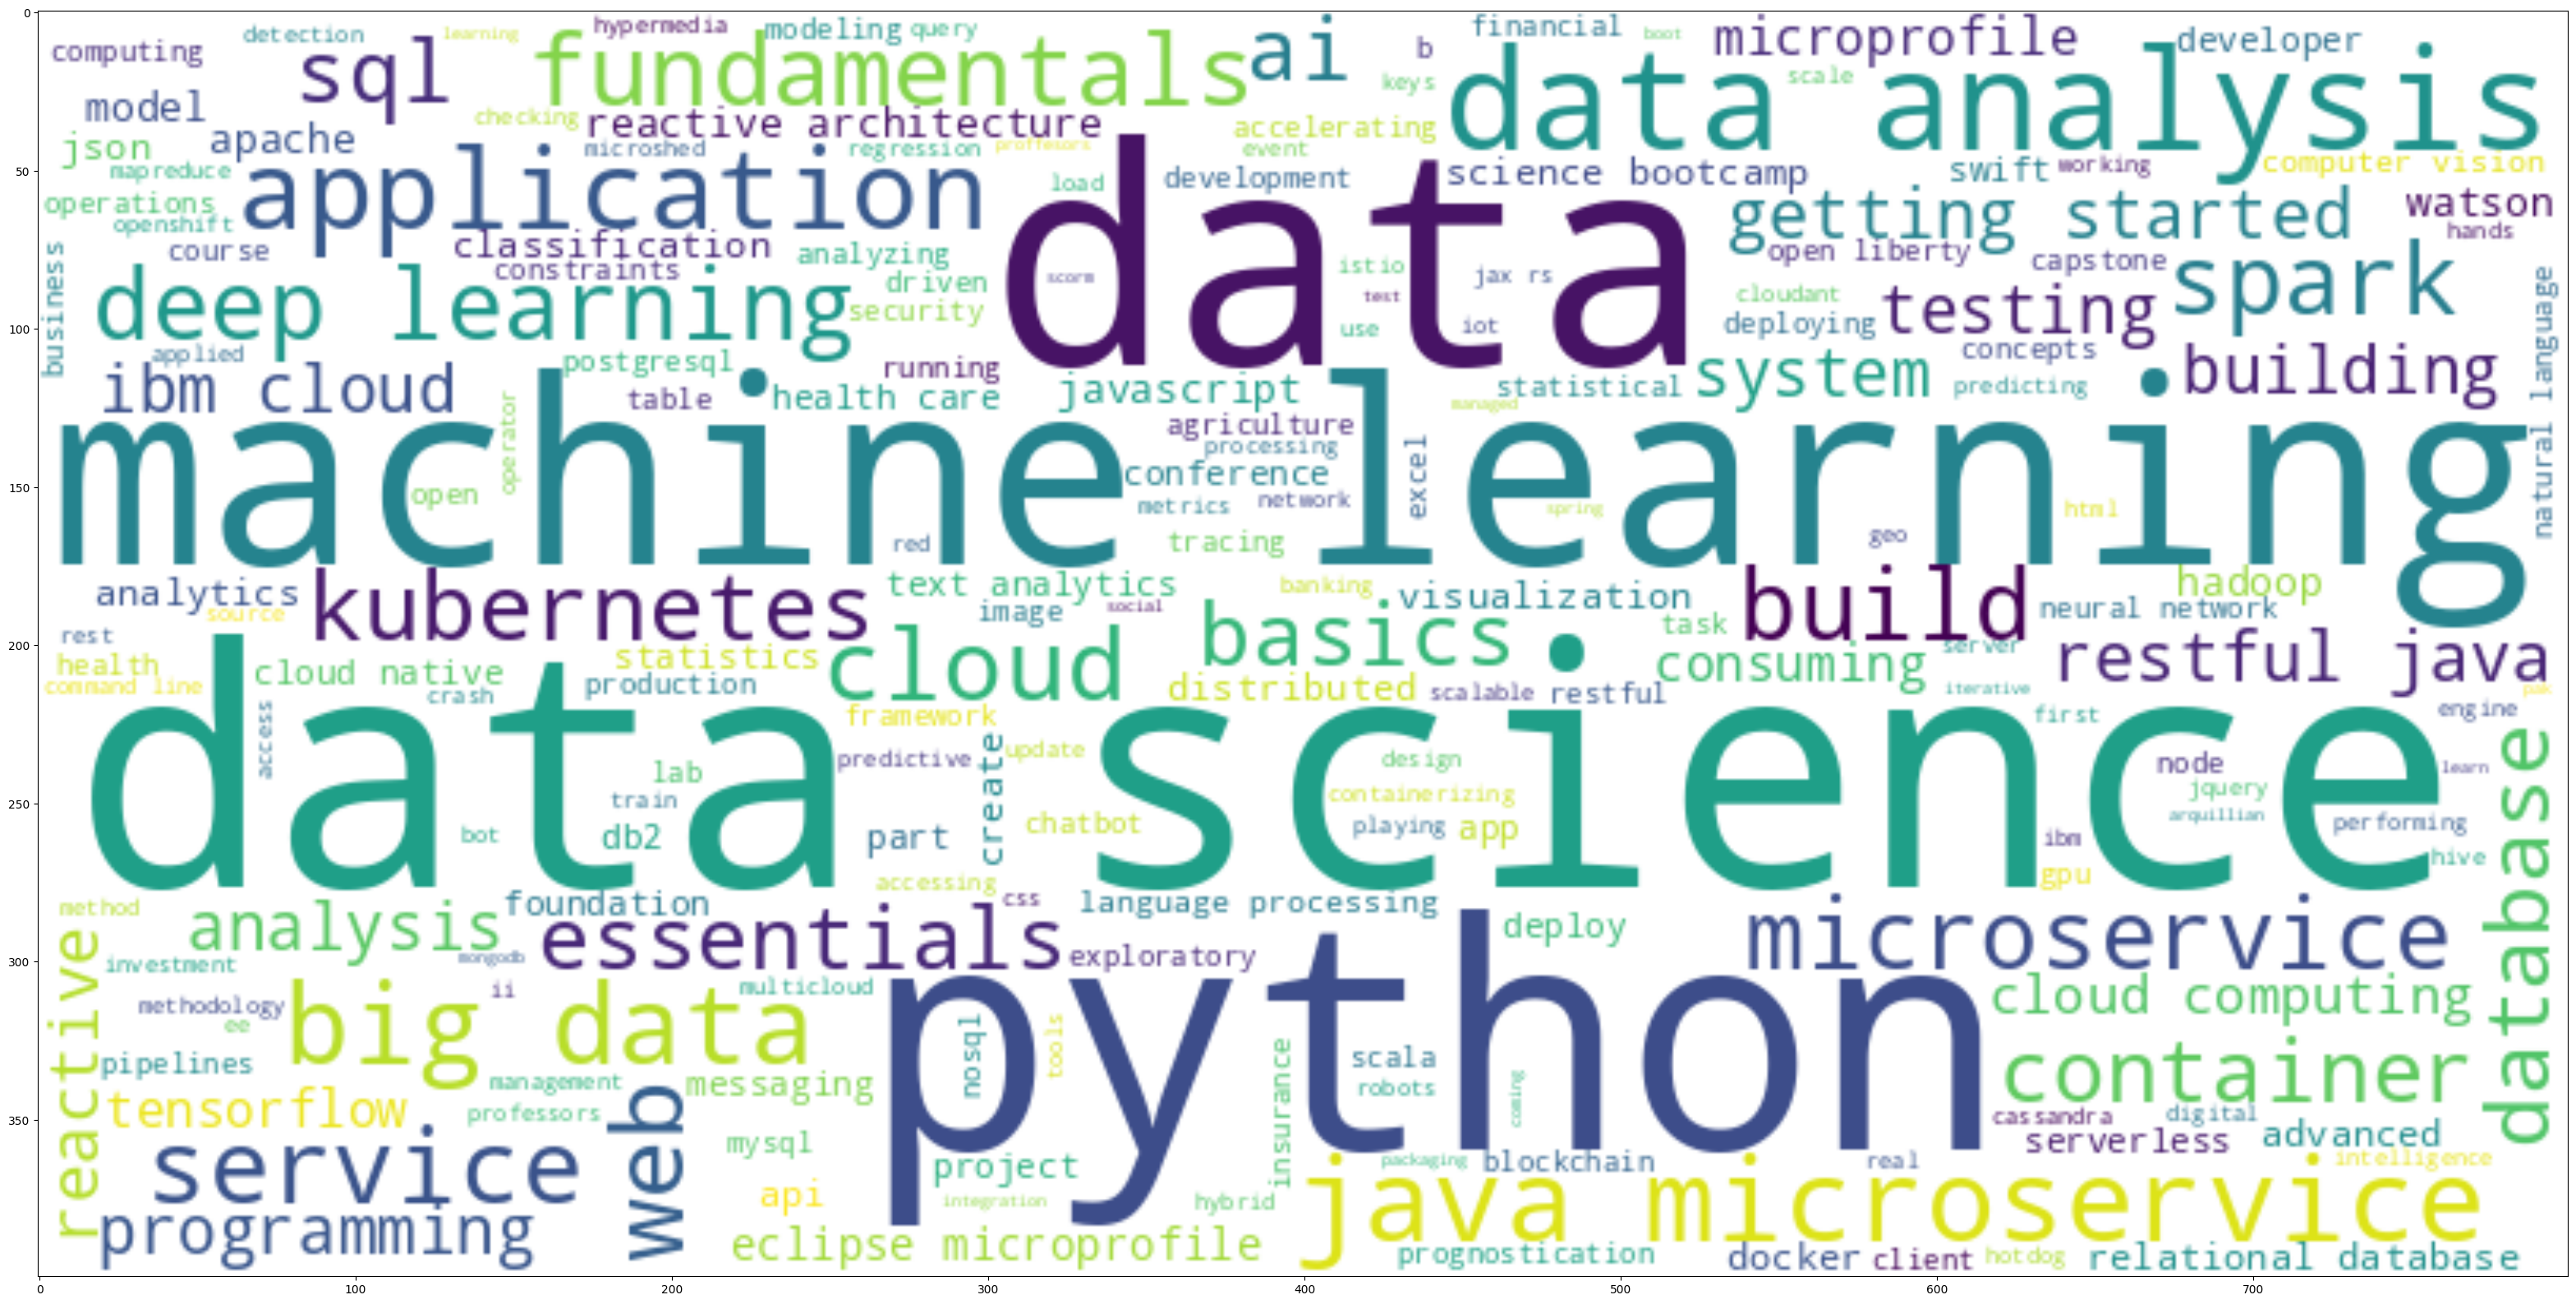

In [ ]:
# visualize the wordl cloud
# Disable axis display
plt.axis("off")
# Create a new figure with a specified size
plt.figure(figsize=(40,20))
# Adjust the layout to ensure tight spacing
plt.tight_layout(pad=0)
# Display the word cloud image with bilinear interpolation
plt.imshow(wordcloud, interpolation='bilinear')
# Show the plot
plt.show()

Analyze Course Genres

In [ ]:

ml_courses = course_df[course_df['MachineLearning'] == 1]
scalable_ml_courses = course_df[(course_df['MachineLearning'] == 1) & (course_df['BigData'] == 1)]

# Select only the genre columns
genre_counts = course_df.iloc[:, 2:].sum().sort_values(ascending=False)
print(genre_counts)



BackendDev         78
MachineLearning    69
Database           60
DataAnalysis       56
DataScience        38
CloudComputing     37
BigData            36
Python             28
FrontendDev        19
Containers         17
R                  17
ComputerVision     10
Chatbot             4
Blockchain          4
dtype: int64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'BackendDev'),
  Text(1, 0, 'MachineLearning'),
  Text(2, 0, 'Database'),
  Text(3, 0, 'DataAnalysis'),
  Text(4, 0, 'DataScience'),
  Text(5, 0, 'CloudComputing'),
  Text(6, 0, 'BigData'),
  Text(7, 0, 'Python'),
  Text(8, 0, 'FrontendDev'),
  Text(9, 0, 'Containers'),
  Text(10, 0, 'R'),
  Text(11, 0, 'ComputerVision'),
  Text(12, 0, 'Chatbot'),
  Text(13, 0, 'Blockchain')])

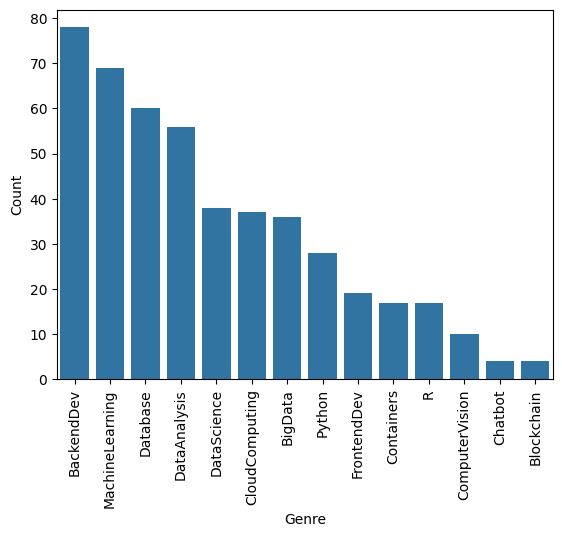

In [ ]:
# plot the data using seaborn (x=genre, y=count)

sns.barplot(data=genre_counts.reset_index(), x='index', y=0)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=90)

Analyze course enrollments

Total enrollments: 233306
Total unique users: 33901


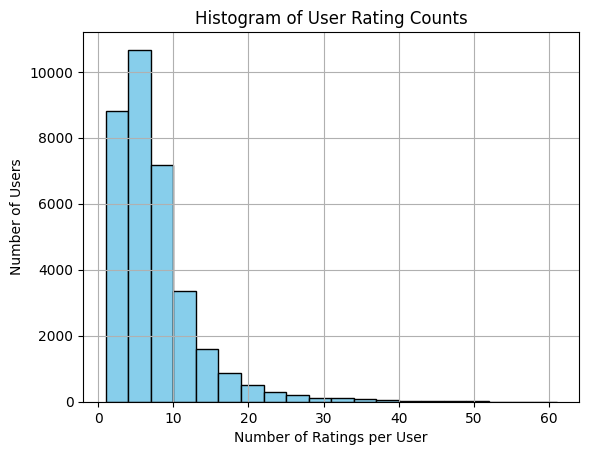

In [ ]:
ratings_df['rating'].unique()
total_enrollments = ratings_df.shape[0]
print(f"Total enrollments: {total_enrollments}")
user_ratings_count = ratings_df.groupby('user').size()
print(f"Total unique users: {len(user_ratings_count)}")

user_ratings_count.describe()
user_ratings_count.hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of User Rating Counts")
plt.xlabel("Number of Ratings per User")
plt.ylabel("Number of Users")
plt.show()


In [ ]:
# fnd the top-20 most popular courses:

course_ratings_count = ratings_df.groupby('item').size().sort_values(ascending=False)
top_20_courses = course_ratings_count.head(20)
print(top_20_courses)

# join with course metadata
top_20_courses_df = pd.merge(top_20_courses.reset_index(), course_df, left_on='item', right_on='COURSE_ID')
top_20_courses_df.rename(columns={0: 'Rating Count'}, inplace=True)

# percentage of top 20 courses:
top_20_total = top_20_courses.sum()
percentage_top_20 = round((top_20_total * 100) / total_enrollments, 2)
print(f"Percentage of top-20 course enrollments: {percentage_top_20}%")




item
PY0101EN      14936
DS0101EN      14477
BD0101EN      13291
BD0111EN      10599
DA0101EN       8303
DS0103EN       7719
ML0101ENv3     7644
BD0211EN       7551
DS0105EN       7199
BC0101EN       6719
DV0101EN       6709
ML0115EN       6323
CB0103EN       5512
RP0101EN       5237
ST0101EN       5015
CC0101EN       4983
CO0101EN       4480
DB0101EN       3697
BD0115EN       3670
DS0301EN       3624
dtype: int64
Percentage of top-20 course enrollments: 63.3%
